In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

from sklearn.preprocessing import MinMaxScaler


In [55]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

In [56]:
name_list =["막걸리_느린마을","막걸리_복순도가","막걸리_죽향도가"]

x_text = '맛'
y_text = '향'

In [57]:
x_list = []
y_list = []
for name in name_list:
    data = pd.read_csv(f"{name}.csv", encoding='utf-8-sig')
    data.drop_duplicates(['text'],ignore_index=True, inplace=True) # 중복 제거
    data.dropna(inplace=True)
    # globals()[f"{name}"]
    x_list.append(len(data[data.text.str.contains(x_text)])/len(data))
    y_list.append(len(data[data.text.str.contains(y_text)])/len(data))


In [58]:
x = np.array(x_list).reshape(-1,1)
y = np.array(y_list).reshape(-1,1)

In [59]:
scaled_x = scaler1.fit_transform(x)
scaled_y = scaler1.fit_transform(y)

In [60]:
target_list = ["막걸리_느린마을","막걸리_복순도가","막걸리_죽향도가"]

In [61]:
plt.rcParams['axes.unicode_minus'] = False

font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()

plt.rc('font', family=font_name) 
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

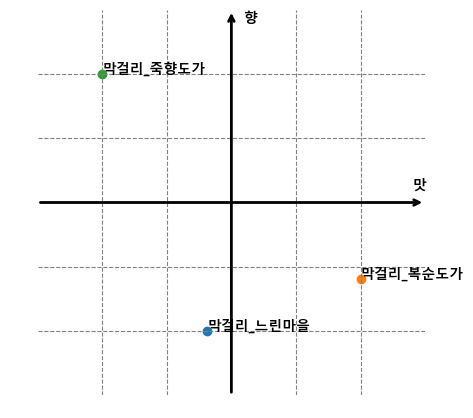

In [62]:
font = {'family' : font_name,
        'weight' : 'bold',
        'size'   : 10}

plt.plot()
plt.rc('font', **font)
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.text(1.2,0.55,x_text)
plt.text(0.55,1.2,y_text)
plt.annotate('',
             ha = 'center', va = 'bottom',
             xytext = (-0.25, 0.5),
             xy = (1.25, 0.5),
             arrowprops = {'edgecolor':'black', 
              'arrowstyle':'->',
              'lw' : 2
              })

plt.annotate('',
             ha = 'center', va = 'bottom',
             xytext = (0.5, -0.25),
             xy = (0.5, 1.25),
             arrowprops = {'edgecolor':'black', 
              'arrowstyle':'->',
              'lw' : 2
              })
plt.grid(True, color='gray', alpha=1, linestyle='--')
plt.xticks([0,0.25,0.75,1], alpha=0)
plt.yticks([0,0.25,0.75,1], alpha=0)
plt.tick_params(axis='both', pad=0, length=0)

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #왼쪽 테두리 제거
for target in target_list:
    target_index = name_list.index(target)
    target_x = scaled_x[target_index]
    target_y = scaled_y[target_index]
    plt.scatter(target_x,target_y)
    plt.text(target_x, target_y, name_list[target_index], size=10)
    
